# Data Retrieval and Preprocessing

In [ ]:
library(forecast)
library(fpp2)
library(tseries)
library(quantmod)

## Preparing the Data

### Data Import

In [ ]:
# Download ^GSPC stock price data from Yahoo Finance
sp500=getSymbols('^GSPC',src = "yahoo",from='2000-01-01',to='2023-12-31',auto.assign=FALSE)

### Data Exploration

In [ ]:
head(sp500)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2000-01-03   1469.25   1478.00  1438.36    1455.22   931800000       1455.22
2000-01-04   1455.22   1455.22  1397.43    1399.42  1009000000       1399.42
2000-01-05   1399.42   1413.27  1377.68    1402.11  1085500000       1402.11
2000-01-06   1402.11   1411.90  1392.10    1403.45  1092300000       1403.45
2000-01-07   1403.45   1441.47  1400.73    1441.47  1225200000       1441.47
2000-01-10   1441.47   1464.36  1441.47    1457.60  1064800000       1457.60

In [ ]:
tail(sp500)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2023-12-21   4724.29   4748.71  4708.35    4746.75  3431180000       4746.75
2023-12-22   4753.92   4772.94  4736.77    4754.63  3046770000       4754.63
2023-12-26   4758.86   4784.72  4758.45    4774.75  2513910000       4774.75
2023-12-27   4773.45   4785.39  4768.90    4781.58  2748450000       4781.58
2023-12-28   4786.44   4793.30  4780.98    4783.35  2698860000       4783.35
2023-12-29   4782.88   4788.43  4751.99    4769.83  3126060000       4769.83

In [ ]:
colnames(sp500)

[1] "GSPC.Open"     "GSPC.High"     "GSPC.Low"      "GSPC.Close"   
[5] "GSPC.Volume"   "GSPC.Adjusted"

In [ ]:
sum(is.na(sp500))

[1] 0

In [ ]:
str(sp500)

An xts object on 2000-01-03 / 2023-12-29 containing: 
  Data:    double [6037, 6]
  Columns: GSPC.Open, GSPC.High, GSPC.Low, GSPC.Close, GSPC.Volume ... with 1 more column
  Index:   Date [6037] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-12-06 14:02:10"


In [ ]:
summary(sp500)

     Index              GSPC.Open        GSPC.High         GSPC.Low     
 Min.   :2000-01-03   Min.   : 679.3   Min.   : 695.3   Min.   : 666.8  
 1st Qu.:2006-01-04   1st Qu.:1191.4   1st Qu.:1198.7   1st Qu.:1184.4  
 Median :2011-12-30   Median :1457.2   Median :1465.7   Median :1448.4  
 Mean   :2012-01-02   Mean   :1973.3   Mean   :1985.0   Mean   :1960.8  
 3rd Qu.:2017-12-29   3rd Qu.:2581.9   3rd Qu.:2596.3   3rd Qu.:2572.2  
 Max.   :2023-12-29   Max.   :4804.5   Max.   :4818.6   Max.   :4781.0  
   GSPC.Close      GSPC.Volume        GSPC.Adjusted   
 Min.   : 676.5   Min.   :3.561e+08   Min.   : 676.5  
 1st Qu.:1191.4   1st Qu.:2.094e+09   1st Qu.:1191.4  
 Median :1457.3   Median :3.443e+09   Median :1457.3  
 Mean   :1973.6   Mean   :3.327e+09   Mean   :1973.6  
 3rd Qu.:2584.8   3rd Qu.:4.160e+09   3rd Qu.:2584.8  
 Max.   :4796.6   Max.   :1.146e+10   Max.   :4796.6  

### Visualize the Data

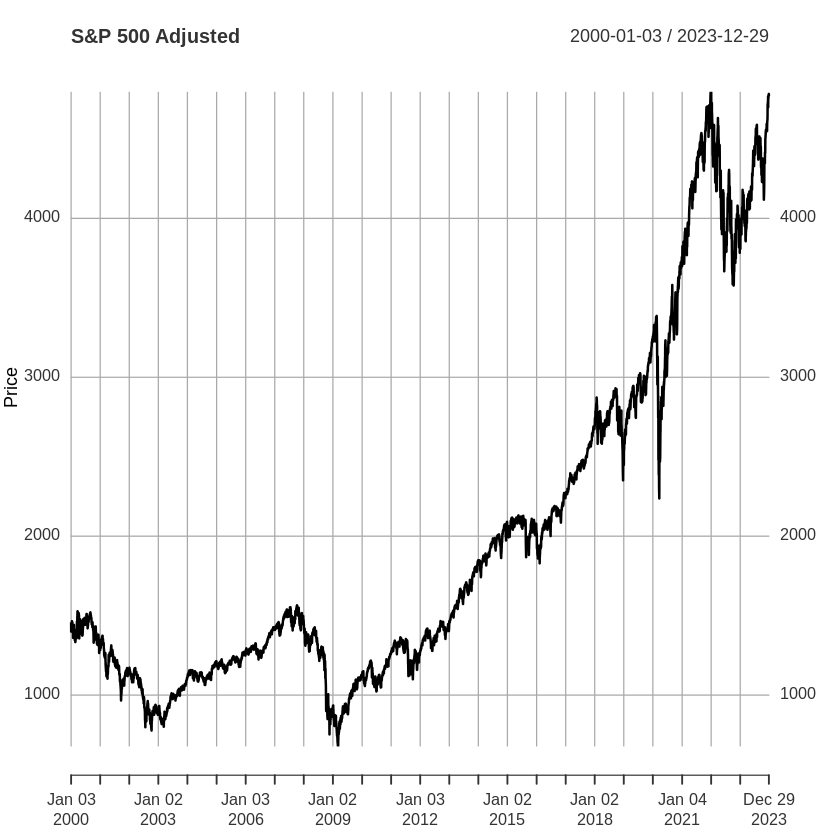

In [ ]:
plot(sp500$GSPC.Adjusted, main="S&P 500 Adjusted", ylab="Price", xlab="Time")

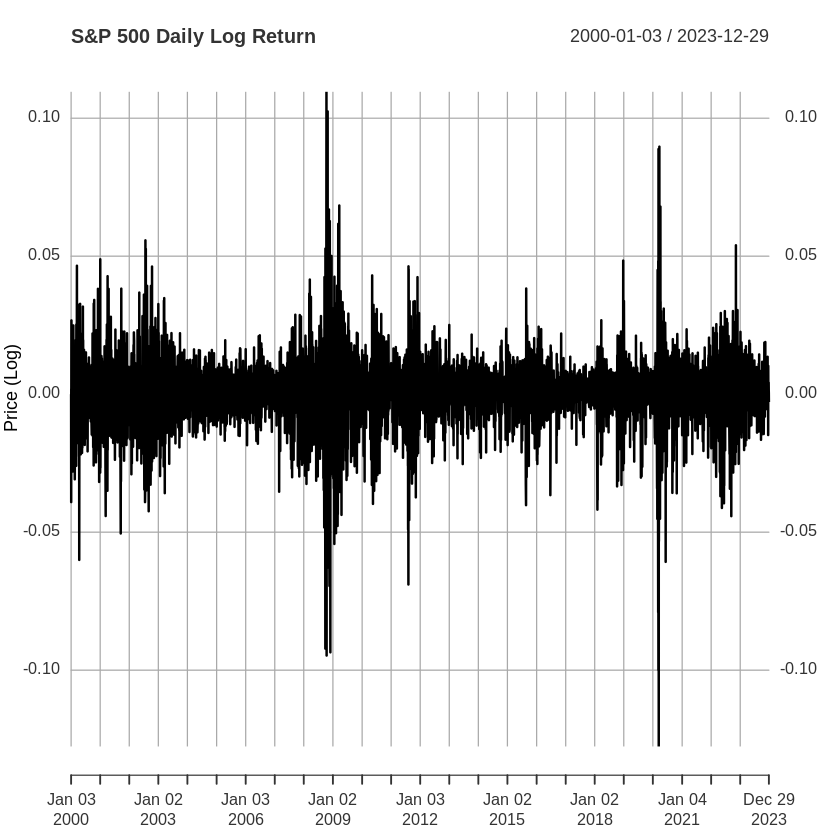

In [ ]:
#Get Daily Log Return Data of all indices to stabilize mean and variance
log_data <- dailyReturn(sp500$GSPC.Adjusted, type='log')
#Plot Differenced Data
plot(log_data, main="S&P 500 Daily Log Return", ylab="Price (Log)", xlab="Time")

### ADF Test

In [ ]:
adf <- adf.test(log_data)
print(adf)

Warning message in adf.test(log_data):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  log_data
Dickey-Fuller = -18.482, Lag order = 18, p-value = 0.01
alternative hypothesis: stationary



### ACF & PACF

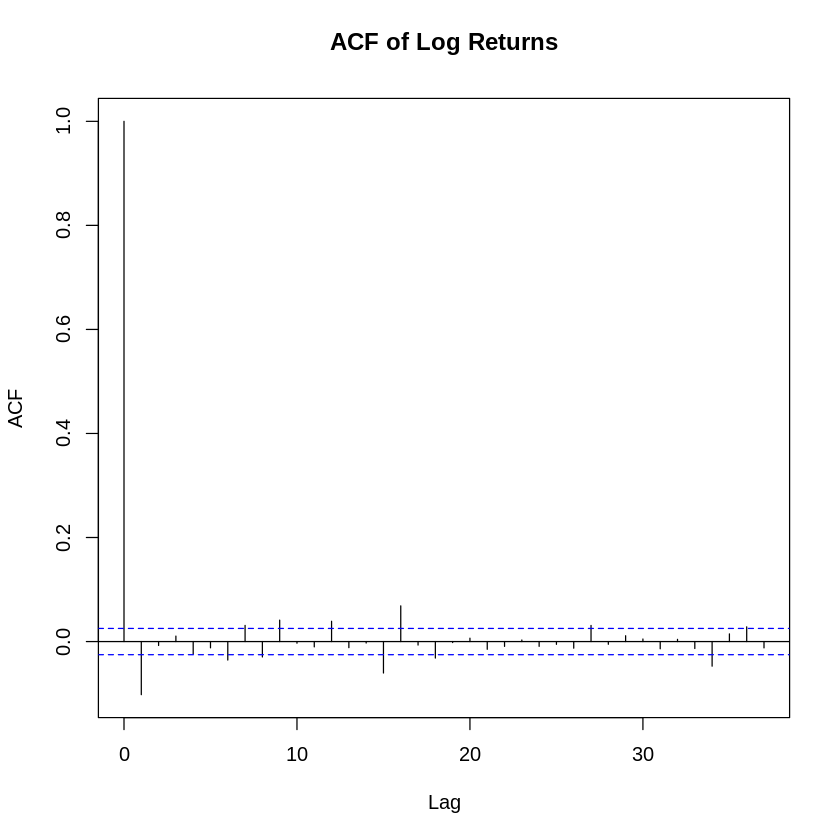

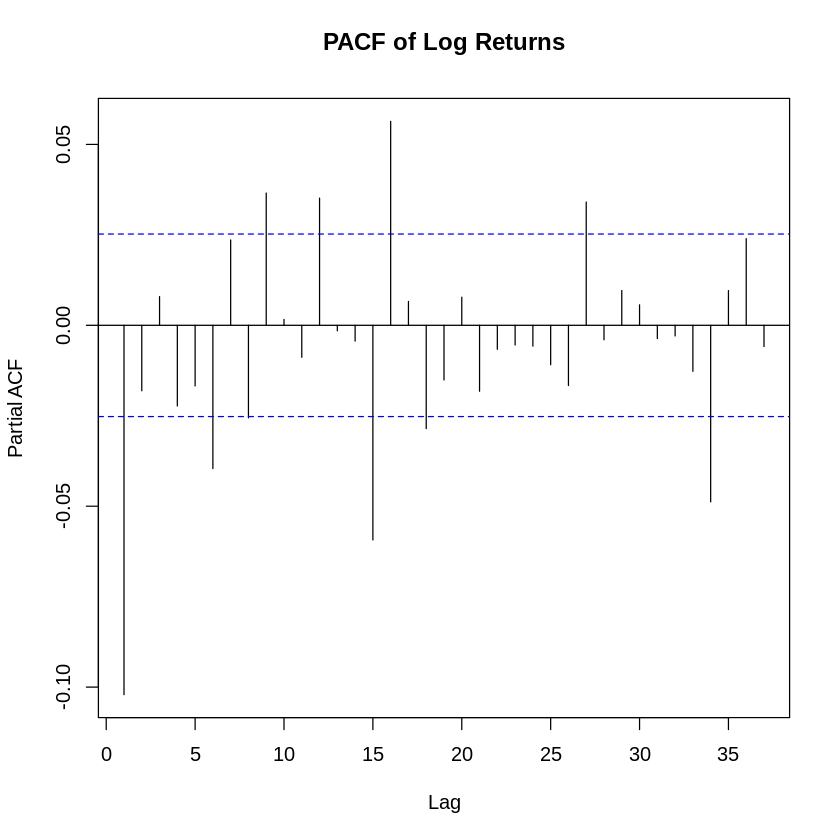

In [ ]:
acf(log_data, main = "ACF of Log Returns")
pacf(log_data, main = "PACF of Log Returns")

### KPSS Test

In [ ]:
kpss.test(log_data)

Warning message in kpss.test(log_data):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  log_data
KPSS Level = 0.32595, Truncation lag parameter = 11, p-value = 0.1


## Fit ARIMA Models

In [ ]:
auto_fit <- auto.arima(log_data, stepwise = FALSE, stationary = FALSE, approximation = FALSE)
summary(auto_fit)

Series: log_data 
ARIMA(1,0,4) with non-zero mean 

Coefficients:
         ar1      ma1     ma2     ma3      ma4   mean
      0.4706  -0.5754  0.0416  0.0138  -0.0345  2e-04
s.e.  0.1890   0.1891  0.0252  0.0152   0.0133  1e-04

sigma^2 = 0.0001515:  log likelihood = 17984.03
AIC=-35954.06   AICc=-35954.05   BIC=-35907.12

Training set error measures:
                        ME       RMSE         MAE MPE MAPE      MASE
Training set -2.187103e-05 0.01230305 0.008166951 NaN  Inf 0.6685713
                     ACF1
Training set 0.0002953815

In [ ]:
fit_1=Arima(log_data, order=c(1,0,0))
fit_2=Arima(log_data, order=c(1,0,1))
fit_3=Arima(log_data, order=c(0,0,1))
fit_4=Arima(log_data, order=c(2,0,0))
fit_5=Arima(log_data, order=c(2,0,1))
summary(fit_1)
summary(fit_2)
summary(fit_3)
summary(fit_4)
summary(fit_5)

Series: log_data 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1   mean
      -0.1021  2e-04
s.e.   0.0128  1e-04

sigma^2 = 0.0001517:  log likelihood = 17979.2
AIC=-35952.4   AICc=-35952.4   BIC=-35932.29

Training set error measures:
                       ME      RMSE         MAE MPE MAPE      MASE         ACF1
Training set 4.634984e-08 0.0123129 0.008168815 NaN  Inf 0.6687239 -0.001863604

Series: log_data 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1   mean
      0.0612  -0.1651  2e-04
s.e.  0.1276   0.1262  1e-04

sigma^2 = 0.0001516:  log likelihood = 17980.1
AIC=-35952.2   AICc=-35952.2   BIC=-35925.38

Training set error measures:
                        ME       RMSE         MAE MPE MAPE      MASE
Training set -1.462108e-06 0.01231107 0.008170005 NaN  Inf 0.6688213
                      ACF1
Training set -1.931885e-05

Series: log_data 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1   mean
      -0.1045  2e-04
s.e.   0.0129  1e-04

sigma^2 = 0.0001516:  log likelihood = 17979.98
AIC=-35953.97   AICc=-35953.96   BIC=-35933.85

Training set error measures:
                       ME      RMSE         MAE MPE MAPE      MASE         ACF1
Training set 5.031217e-08 0.0123113 0.008169855 NaN  Inf 0.6688091 0.0006363069

Series: log_data 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2   mean
      -0.1039  -0.0181  2e-04
s.e.   0.0129   0.0129  1e-04

sigma^2 = 0.0001516:  log likelihood = 17980.19
AIC=-35952.38   AICc=-35952.38   BIC=-35925.56

Training set error measures:
                        ME       RMSE         MAE MPE MAPE      MASE
Training set -3.518532e-07 0.01231088 0.008169846 NaN  Inf 0.6688083
                     ACF1
Training set 0.0001290973

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: log_data 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
          ar1      ar2      ma1   mean
      -0.0518  -0.0124  -0.0519  2e-04
s.e.      NaN      NaN      NaN  1e-04

sigma^2 = 0.0001517:  log likelihood = 17980.15
AIC=-35950.3   AICc=-35950.29   BIC=-35916.77

Training set error measures:
                        ME       RMSE         MAE MPE MAPE      MASE
Training set -4.260084e-07 0.01231097 0.008169815 NaN  Inf 0.6688058
                      ACF1
Training set -0.0001123097

## Residual Diagnostics

### Auto


	Ljung-Box test

data:  Residuals from ARIMA(1,0,4) with non-zero mean
Q* = 21.494, df = 5, p-value = 0.0006532

Model df: 5.   Total lags used: 10



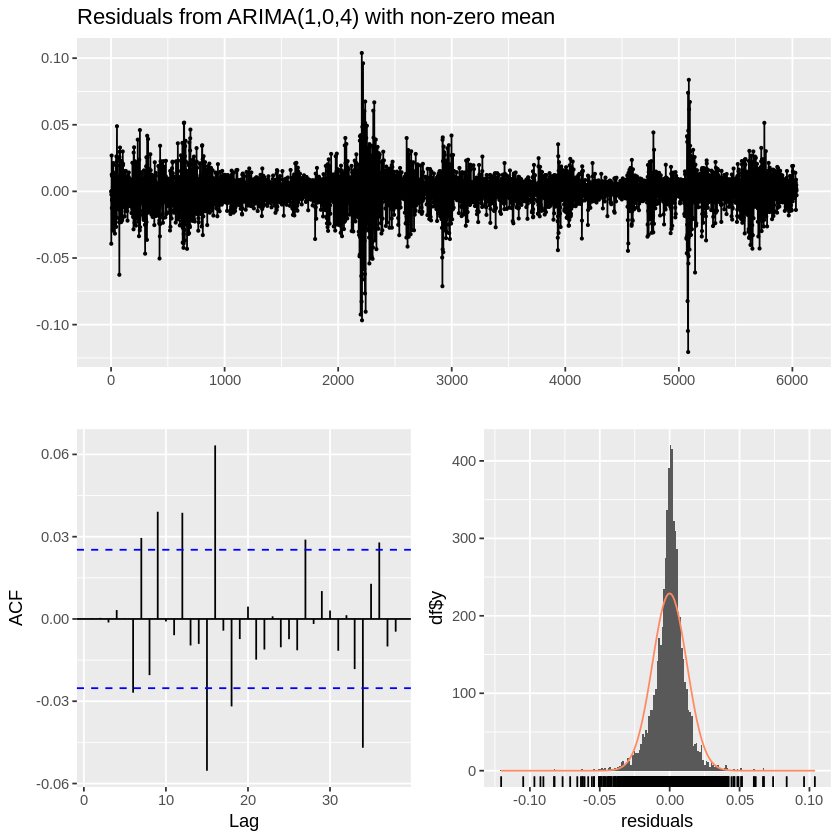

In [ ]:
checkresiduals(auto_fit)

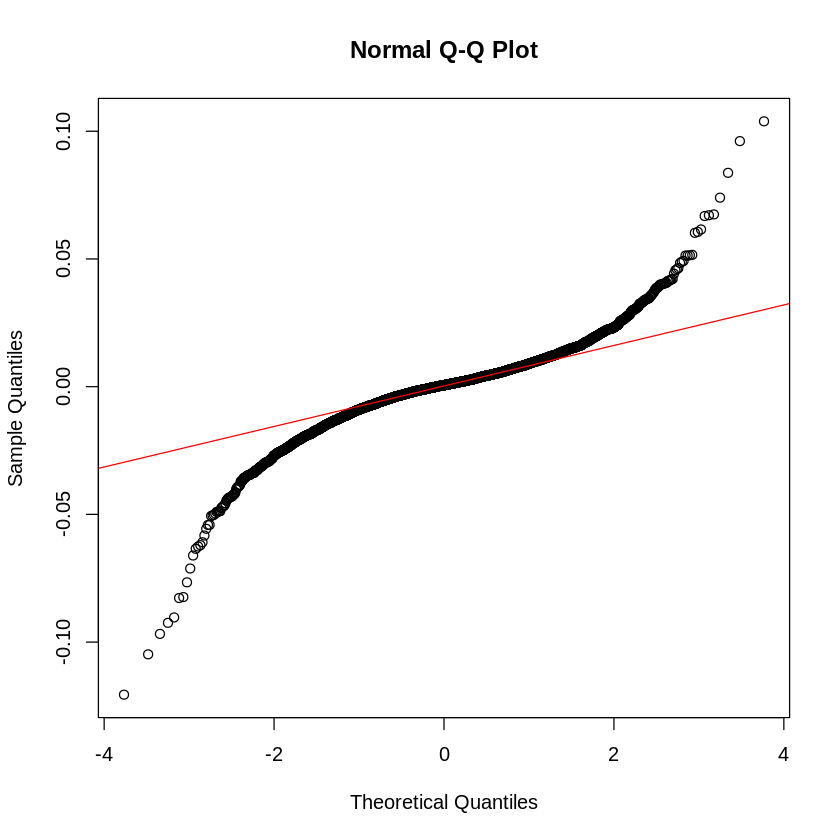

In [ ]:
qqnorm(residuals(auto_fit))
qqline(residuals(auto_fit), col = "red")

In [ ]:
ks.test(residuals(auto_fit), "pnorm", mean = mean(residuals(auto_fit)), sd = sd(residuals(auto_fit)))



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(auto_fit)
D = 0.092963, p-value < 2.2e-16
alternative hypothesis: two-sided


### Fit 1


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 30.835, df = 9, p-value = 0.000316

Model df: 1.   Total lags used: 10



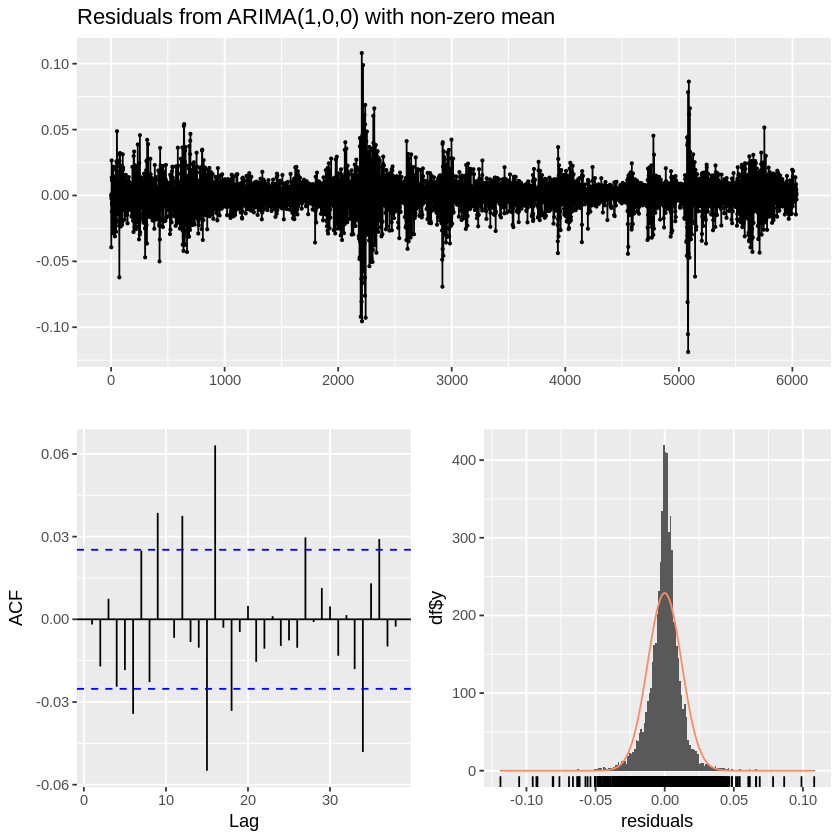

In [ ]:
checkresiduals(fit_1)

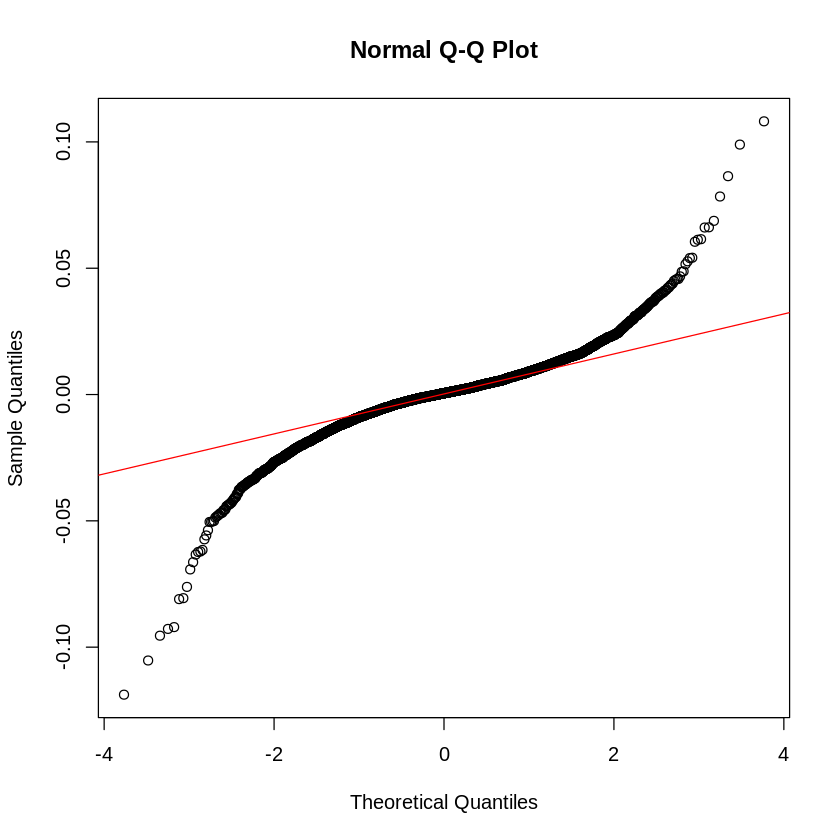

In [ ]:
qqnorm(residuals(fit_1))
qqline(residuals(fit_1), col = "red")

In [ ]:
ks.test(residuals(fit_1), "pnorm", mean = mean(residuals(fit_1)), sd = sd(residuals(fit_1)))



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(fit_1)
D = 0.092324, p-value < 2.2e-16
alternative hypothesis: two-sided


### Fit 2


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 29.835, df = 8, p-value = 0.000226

Model df: 2.   Total lags used: 10



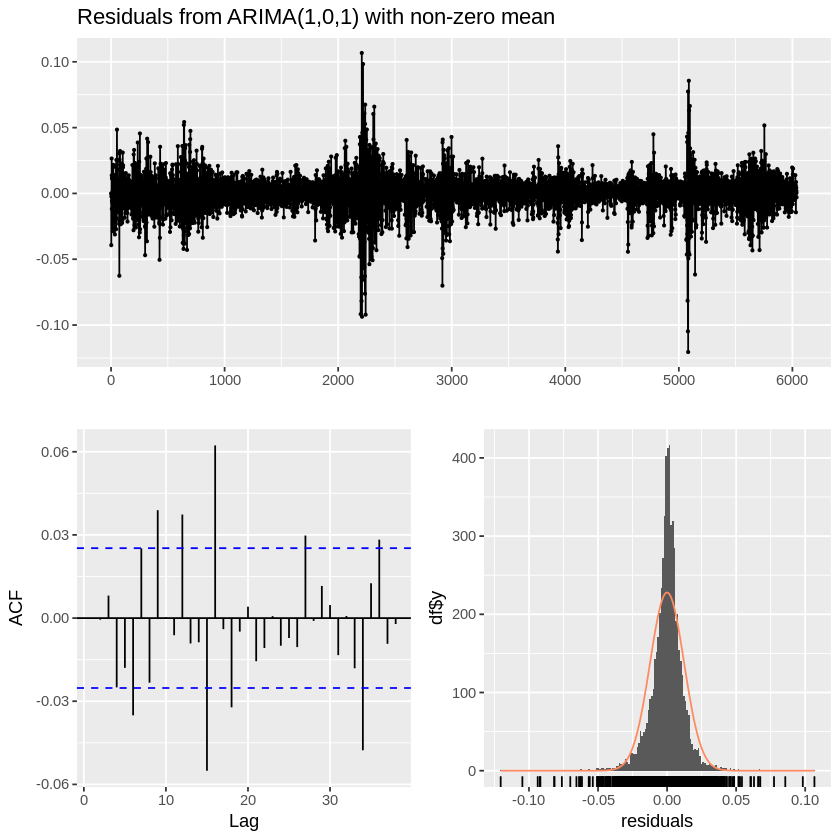

In [ ]:
checkresiduals(fit_2)

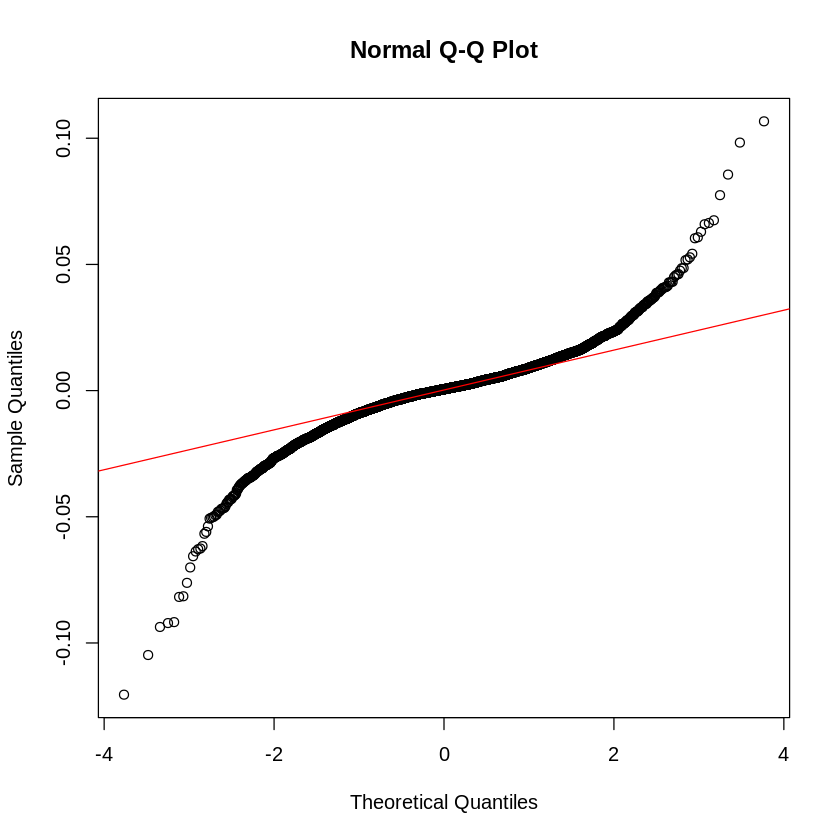

In [ ]:
qqnorm(residuals(fit_2))
qqline(residuals(fit_2), col = "red")

In [ ]:
ks.test(residuals(fit_2), "pnorm", mean = mean(residuals(fit_2)), sd = sd(residuals(fit_2)))



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(fit_2)
D = 0.092257, p-value < 2.2e-16
alternative hypothesis: two-sided


### Fit 3


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 29.759, df = 9, p-value = 0.0004821

Model df: 1.   Total lags used: 10



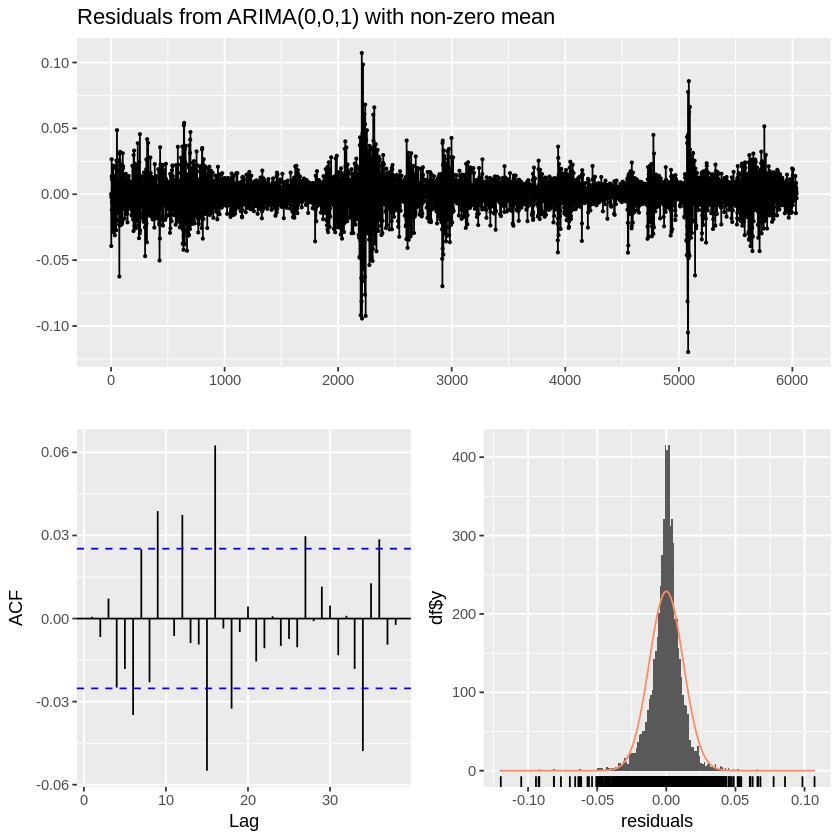

In [ ]:
checkresiduals(fit_3)

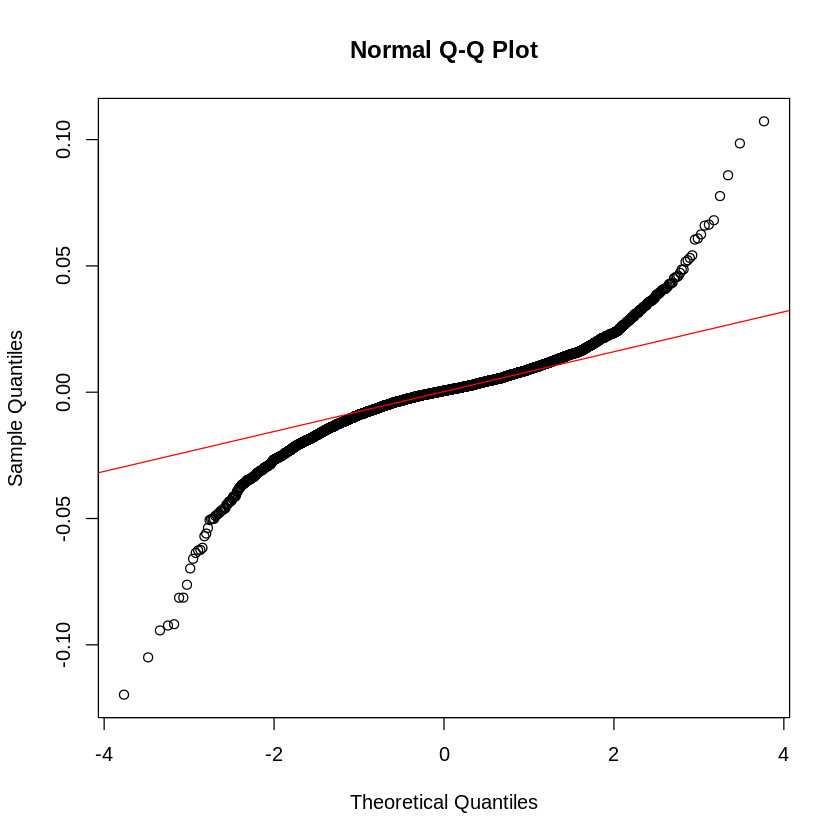

In [ ]:
qqnorm(residuals(fit_3))
qqline(residuals(fit_3), col = "red")

In [ ]:
ks.test(residuals(fit_3), "pnorm", mean = mean(residuals(fit_3)), sd = sd(residuals(fit_3)))



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(fit_3)
D = 0.092201, p-value < 2.2e-16
alternative hypothesis: two-sided


### Fit 4


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 29.777, df = 8, p-value = 0.0002314

Model df: 2.   Total lags used: 10



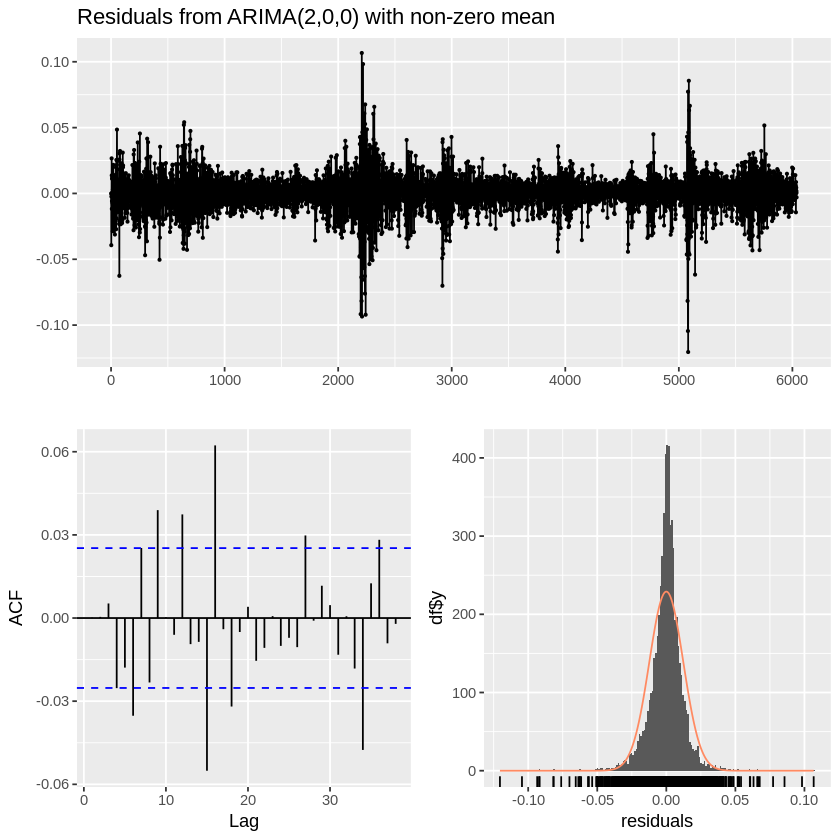

In [ ]:
checkresiduals(fit_4)

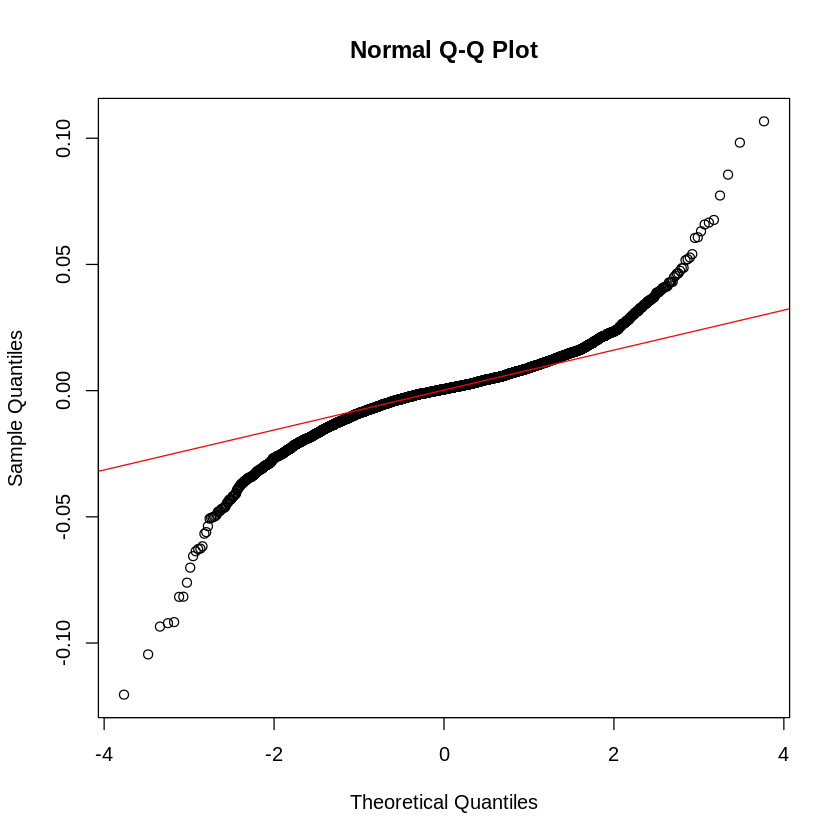

In [ ]:
qqnorm(residuals(fit_4))
qqline(residuals(fit_4), col = "red")

In [ ]:
ks.test(residuals(fit_4), "pnorm", mean = mean(residuals(fit_4)), sd = sd(residuals(fit_4)))



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(fit_4)
D = 0.092108, p-value < 2.2e-16
alternative hypothesis: two-sided


### Fit 5


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with non-zero mean
Q* = 29.828, df = 7, p-value = 0.0001021

Model df: 3.   Total lags used: 10



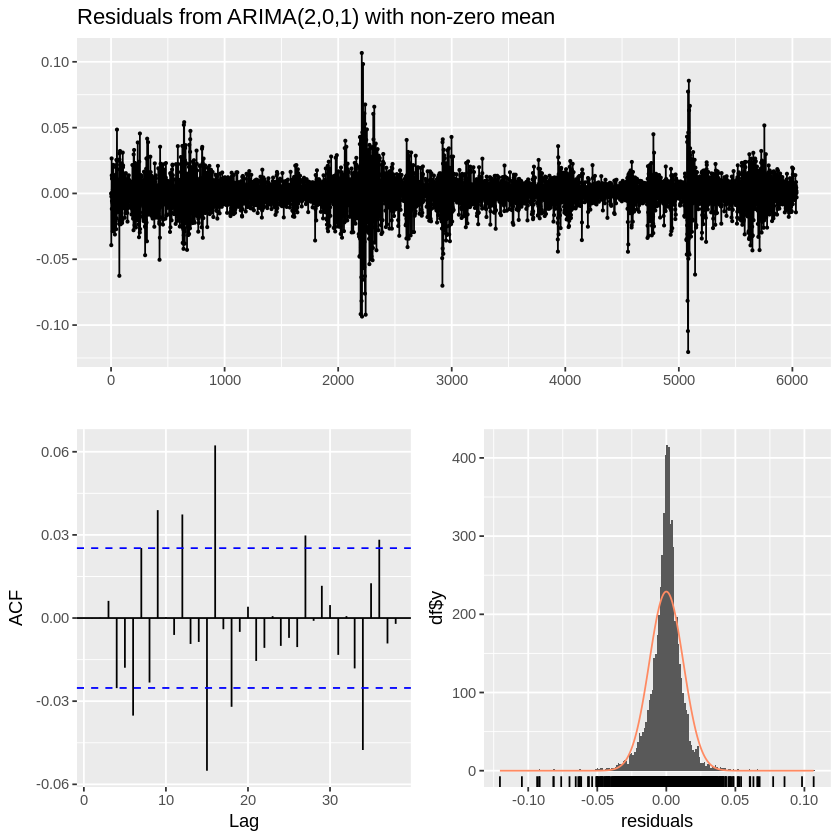

In [ ]:
checkresiduals(fit_5)

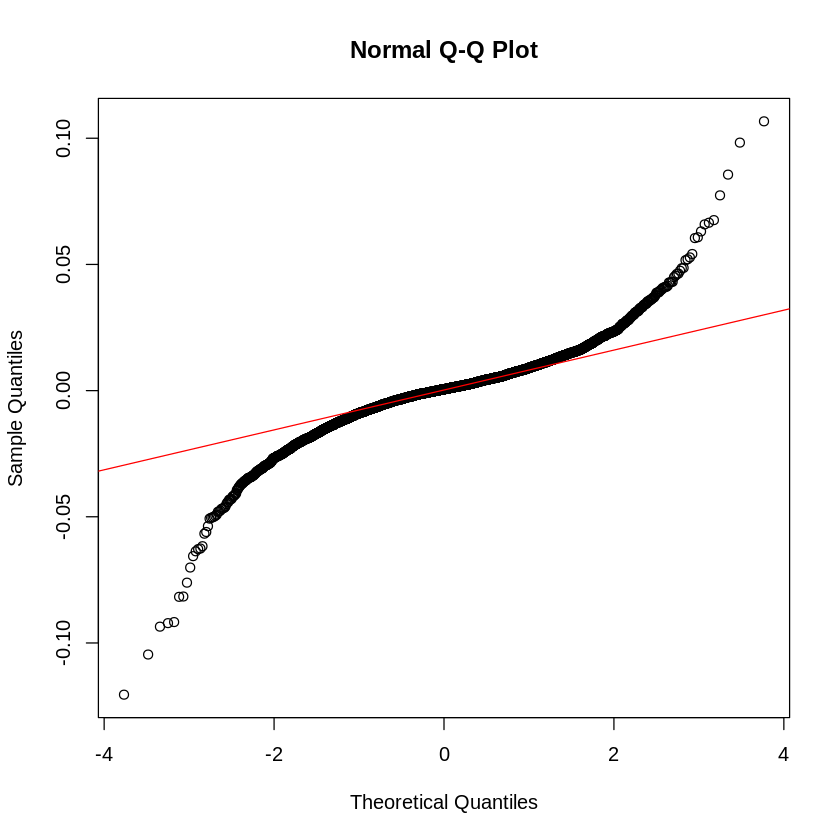

In [ ]:
qqnorm(residuals(fit_5))
qqline(residuals(fit_5), col = "red")

In [ ]:
ks.test(residuals(fit_5), "pnorm", mean = mean(residuals(fit_5)), sd = sd(residuals(fit_5)))



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(fit_5)
D = 0.092119, p-value < 2.2e-16
alternative hypothesis: two-sided


## New

In [ ]:
# Define the split point (e.g., last 20% of the data as test set)
n <- length(sp500$GSPC.Adjusted)
train_size <- round(0.8 * n)

# Split the data
train_data <- log_data[1:train_size]
test_data <- log_data[(train_size + 1):n]


In [ ]:
# Fit ARIMA(1,0,4) on the training set
model_1_0_4 <- Arima(train_data, order = c(1, 0, 4))

# Fit ARIMA(2,0,1) on the training set
model_1_0_1 <- Arima(train_data, order = c(1, 0, 1))


In [ ]:
# Forecast using ARIMA(1,0,4)
forecast_1_0_4 <- forecast(model_1_0_4, h = length(test_data))

# Forecast using ARIMA(2,0,1)
forecast_1_0_1 <- forecast(model_1_0_1, h = length(test_data))


In [ ]:
# Evaluate ARIMA(1,0,4)
accuracy_1_0_4 <- accuracy(forecast_1_0_4, test_data)

# Evaluate ARIMA(2,0,1)
accuracy_1_0_1 <- accuracy(forecast_1_0_1, test_data)

# Print the results
print("ARIMA(1,0,4) Accuracy:")
print(accuracy_1_0_4)

print("ARIMA(1,0,1) Accuracy:")
print(accuracy_1_0_1)


[1] "ARIMA(1,0,4) Accuracy:"
                        ME       RMSE         MAE      MPE     MAPE      MASE
Training set -3.619466e-06 0.01197784 0.007990022      NaN      Inf 0.6666990
Test set      2.963423e-04 0.01364658 0.008895214 98.75527 103.7568 0.7422294
                     ACF1
Training set 0.0007078051
Test set               NA
[1] "ARIMA(1,0,1) Accuracy:"
                        ME       RMSE         MAE     MPE     MAPE      MASE
Training set -9.541555e-06 0.01199007 0.007994269     NaN      Inf 0.6670533
Test set      2.906892e-04 0.01364649 0.008894689 98.8951 103.7877 0.7421856
                    ACF1
Training set 0.001133505
Test set              NA


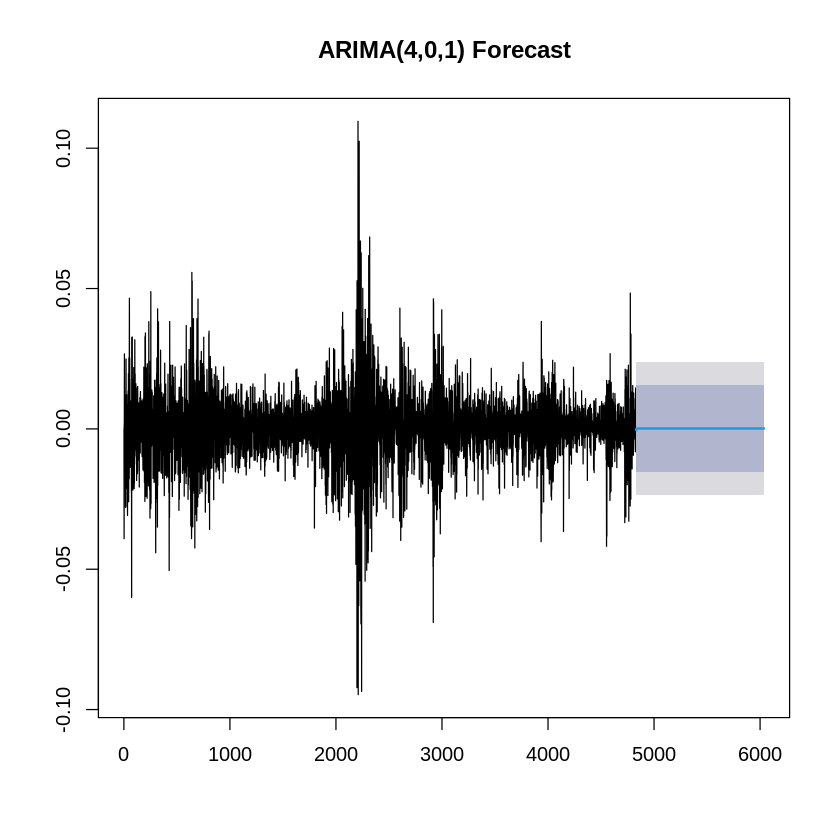

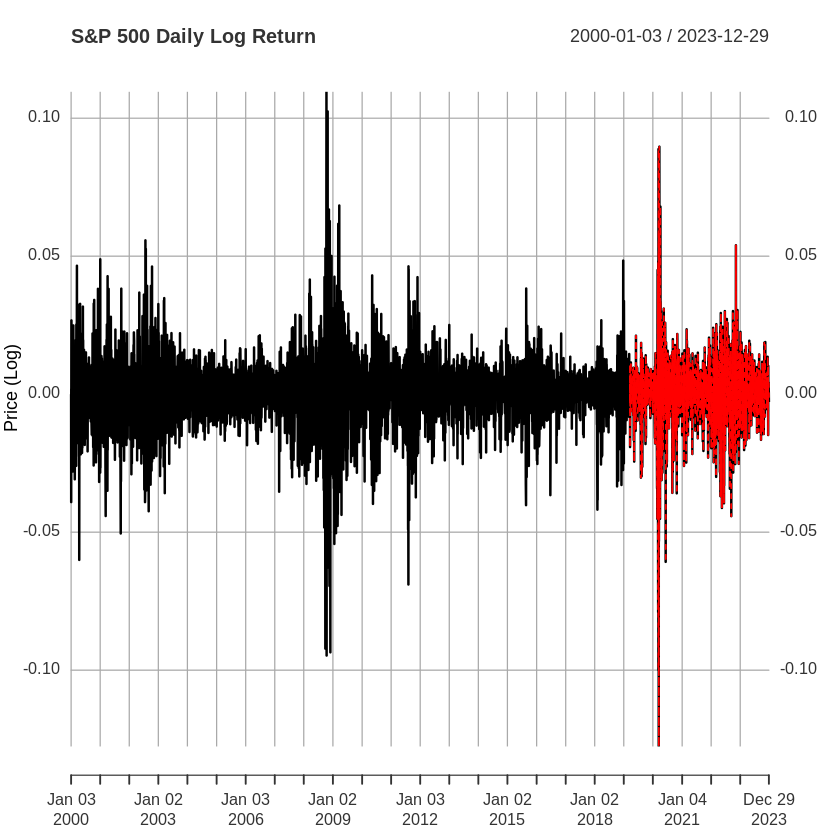

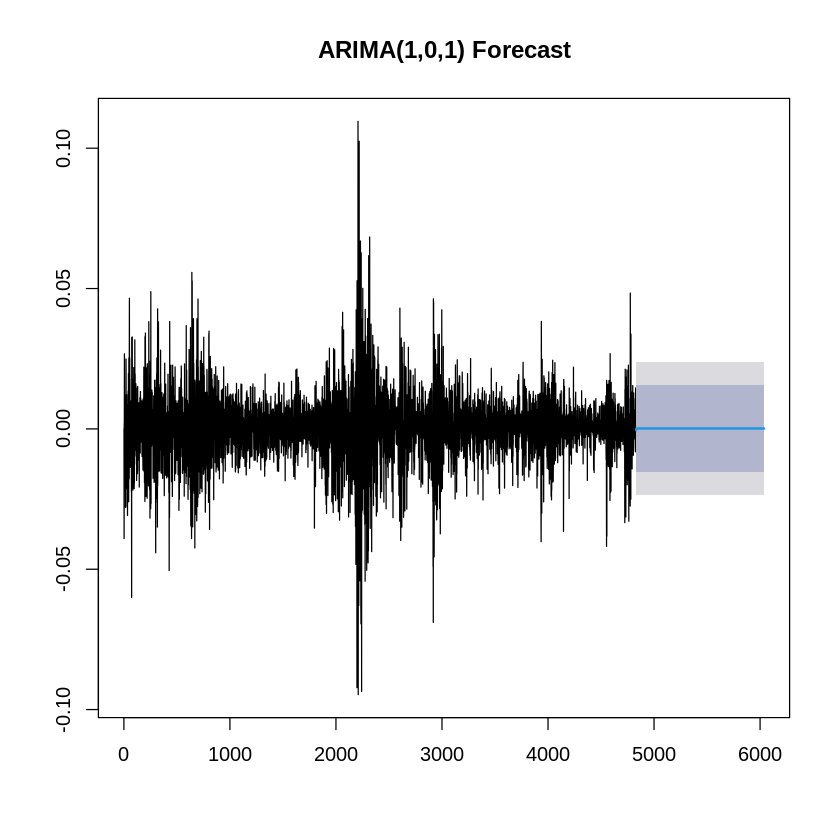

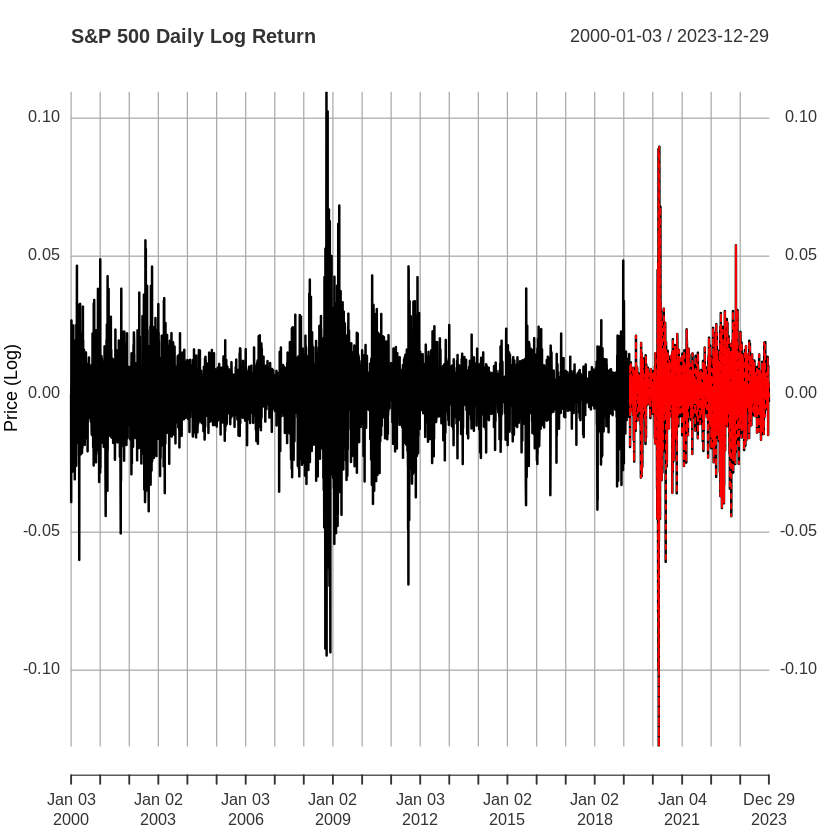

In [ ]:
# Plot actual vs forecast for ARIMA(4,0,1)
plot(forecast_4_0_1, main = "ARIMA(4,0,1) Forecast")
lines(test_data, col = "red", lty = 2)  # Add the actual data in red

# Plot actual vs forecast for ARIMA(1,0,1)
plot(forecast_1_0_1, main = "ARIMA(1,0,1) Forecast")
lines(test_data, col = "red", lty = 2)  # Add the actual data in red
